[View in Colaboratory](https://colab.research.google.com/github/andersy005/video-game-graphics-to-reality-and-back/blob/master/notebooks/image_translation.ipynb)

# Install Colaboratory Tools

In [0]:
!pip uninstall colabtools -y

In [0]:
#@title Default title text
!pip install git+https://github.com/andersy005/colaboratory-tools.git --no-cache-dir

# Load Data

Check to see if the data is already available. If not, download the data from google drive and extract the files from compressed files.

In [0]:
%%bash
if [ ! -f gta.tar.gz ]; then
  echo "File not found!"
 
  wget --header 'Host: doc-0o-58-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:59.0) Gecko/20100101 Firefox/59.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/drive/u/1/folders/1B56WZ20ODejt7MAwFr0a2HnMJ0fz4VlN' --header 'Cookie: AUTH_e1273drrbkihn7uunefac5g2nh6fppao=07610261954870412584|1523390400000|kf36r1s9jup16ems1p1f2sckdgrlvbhm; NID=123=lBPWjtG4k1sU7Dd0qsq5jpbqEiDrMBU8x0r6kdqXBCf-pCwxt9y7UdTTVaEFzLR7u5w-wq6dp0xKDTIsDb6QCnL0jNICERWUAuRHrxjQlpzo8gI8bqEpJJBDhN1T2RNR' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-0o-58-docs.googleusercontent.com/docs/securesc/u8k4a259k8v0rijo1dv2q4t69g74544s/il57erfe3koja1994495ashvpr49mjfs/1523390400000/07610261954870412584/07610261954870412584/1gKCTPV_pCWaIEuiQ5IWP8rQSh040ezOL?h=11006290462901738094&e=download' --output-document 'city.tar.gz'
  wget --header 'Host: doc-14-58-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:59.0) Gecko/20100101 Firefox/59.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://drive.google.com/drive/u/1/folders/1B56WZ20ODejt7MAwFr0a2HnMJ0fz4VlN' --header 'Cookie: AUTH_e1273drrbkihn7uunefac5g2nh6fppao=07610261954870412584|1523390400000|kf36r1s9jup16ems1p1f2sckdgrlvbhm; NID=123=lBPWjtG4k1sU7Dd0qsq5jpbqEiDrMBU8x0r6kdqXBCf-pCwxt9y7UdTTVaEFzLR7u5w-wq6dp0xKDTIsDb6QCnL0jNICERWUAuRHrxjQlpzo8gI8bqEpJJBDhN1T2RNR' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-14-58-docs.googleusercontent.com/docs/securesc/u8k4a259k8v0rijo1dv2q4t69g74544s/3le4pio11hb399ub230qat6883ggjv5n/1523390400000/07610261954870412584/07610261954870412584/1TxNprMLCTVnTWV9QIYDve5mv_DjOsCNb?h=11006290462901738094&e=download' --output-document 'gta.tar.gz'
  tar -zxvf gta.tar.gz
  tar -zxvf city.tar.gz
 
fi

In [0]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

from colabtools.pytorch import datasets as cds
from torch import utils
from torchvision import transforms

# Plot some images from both datasets

In [0]:
compose = transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            #transforms.Normalize((.5, .5, .5), (.5, .5, .5))
        ])
gta = cds.CustomDataset(root_dir='./gta/images/', transform=compose)
gta_loader = utils.data.DataLoader(gta, num_workers=4, shuffle=True, 
                                   batch_size=4)
city = cds.CustomDataset(root_dir='./city_real/', transform=compose)
city_loader = utils.data.DataLoader(city, num_workers=4, shuffle=True,
                                   batch_size=4)

def show_images(loader):
  for i_batch, sample_batched in enumerate(loader):
    print(i_batch, sample_batched.size())

    if i_batch == 3:
      cds.show_batch(sample_batched)
      plt.show()
      break


show_images(gta_loader)

0 torch.Size([4, 3, 256, 256])
1 torch.Size([4, 3, 256, 256])
2 torch.Size([4, 3, 256, 256])
3 torch.Size([4, 3, 256, 256])


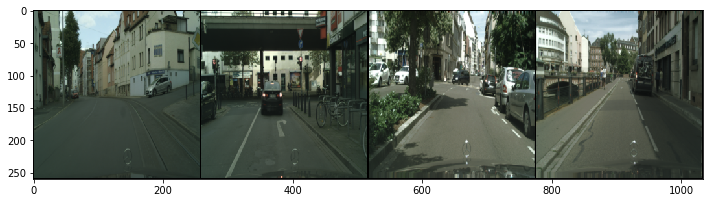

In [6]:
show_images(city_loader)